In [11]:
#Implementing the Black-Scholes in Python
#Daniel Ying and Erick Mokaya
#The Black-Scholes formula is used to price European call and put options. It is a solution to
#the Black-Scholes Partial Differential Equation given below:

#T - Time to maturity
#St – The current Stock Price
#R – The risk free interest rate
#N(x) – The cumulative normal distribution evaluated at x
#v- The volatility
#K – The Strike Price
#It is assumed that the stock will not pay dividends during the period.
#We successfully implemented the Black-Scholes model in Python using the attached code and
#used it to value call and put options. The values generated have been plotted as function of the
#strike Price. Further, different graphs with different times to maturity were generated showing
#clearly how the solutions converge to a hockey stick as maturity nears. As an aside, we have
#also created a code for calculating the Greeks in Black Scholes.

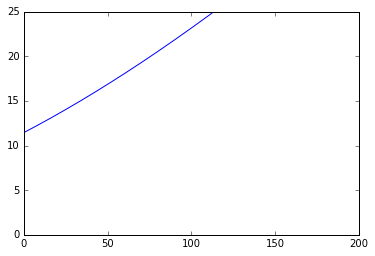

In [12]:
#For a European call
"""
# The Black Scholes Formula
# CallPutFlag - This is set to 'c' for call option, anything else for put
# S - Stock price
# K - Strike price
# T - Time to maturity
# r - Riskfree interest rate
# d - Dividend yield
# v - Volatility
"""
%matplotlib inline
from scipy.stats import norm
from math import *
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

def BlackScholes(CallPutFlag,S,K,T,r,d,v):
    d1 = (log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*sqrt(T))
    d2 = d1-v*sqrt(T)
    if CallPutFlag=='c':
        return S*exp(-d*T)*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
    else:
        return K*exp(-r*T)*norm.cdf(-d2)-S*exp(-d*T)*norm.cdf(-d1)

def update(step):
    p = []
    for i in S:
        p.append(BlackScholes('c', i, 100, step, 0.06, 0, 0.4))
    line.set_ydata(p)

def data_gen():
    expStop = 0.0005
    expStart = 1.5
    T = np.linspace(expStop,expStart,200)
    m = -log(expStop/expStart)/expStart
    for t in T:
        yield expStart*exp(-m*t)


plt.clf()
fig,ax = plt.subplots()
maturity = 0
S = np.linspace(80,120,200)
p = []
for i in S:
    p.append(BlackScholes('c', i, 100, 0.005, 0.06, 0, 0.4))
line, = ax.plot(p)
#ax.set_ylim()    
ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

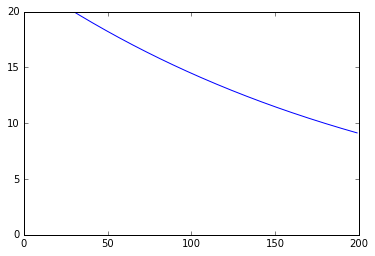

In [13]:
#For a European Put
"""
# The Black Scholes Formula
# CallPutFlag - This is set to 'c' for call option, anything else for put
# S - Stock price
# K - Strike price
# T - Time to maturity
# r - Riskfree interest rate
# d - Dividend yield
# v - Volatility
"""
from scipy.stats import norm
from math import *
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

def BlackScholes(CallPutFlag,S,K,T,r,d,v):
    d1 = (log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*sqrt(T))
    d2 = d1-v*sqrt(T)
    if CallPutFlag=='c':
        return S*exp(-d*T)*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
    else:
        return K*exp(-r*T)*norm.cdf(-d2)-S*exp(-d*T)*norm.cdf(-d1)
def update(step):
    p = []
    for i in S:
        p.append(BlackScholes('p', i, 100, step, 0.06, 0, 0.4))
    line.set_ydata(p)

def data_gen():
    expStop = 0.0005
    expStart = 1.5
    T = np.linspace(expStop,expStart,200)
    m = -log(expStop/expStart)/expStart
    for t in T:
        yield expStart*exp(-m*t)

        
plt.clf()
fig,ax = plt.subplots()
maturity = 0
S = np.linspace(80,120,200)
p = []
for i in S:
    p.append(BlackScholes('p', i, 100, 0.005, 0.06, 0, 0.4))
line, = ax.plot(p)
#ax.set_ylim()
    
ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

In [14]:
# The Greeks
"""Calculating the partial derivatives for a Black Scholes Option (Call)
# S - Stock price
# K - Strike price
# T - Time to maturity
# r - Riskfree interest rate
# d - Dividend yield
# v - Volatility
Return:
Delta: partial wrt S
Gamma: second partial wrt S
Theta: partial wrt T
Vega: partial wrt v
Rho: partial wrt r
"""
from scipy.stats import norm
from math import *

def Black_Scholes_Greeks_Call(S, K, r, v, T, d):
    T_sqrt = sqrt(T)
    d1 = (log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*T_sqrt)
    d2 = d1-v*T_sqrt
    Delta = norm.cdf(d1)
    Gamma = norm.pdf(d1)/(S*v*T_sqrt)
    Theta =- (S*v*norm.pdf(d1))/(2*T_sqrt) - r*K*exp( -r*T)*norm.cdf(d2)
    Vega = S * T_sqrt*norm.pdf(d1)
    Rho = K*T*exp(-r*T)*norm.cdf(d2)
    return Delta, Gamma, Theta, Vega, Rho

print ( Black_Scholes_Greeks_Call(100, 100, 0.005, 0.06, 0.4, 0) )

(0.5285710345530259, 0.10486079971293322, -2.1437085315040076, 25.166591931103973, 20.497130933696781)


In [15]:
"""Calculating the partial derivatives for a Black Scholes Option (Put)
# S - Stock price
# K - Strike price
# T - Time to maturity
# r - Riskfree interest rate
# d - Dividend yield
# v - Volatility
Return:
Delta: partial wrt S
Gamma: second partial wrt S
Theta: partial wrt T
Vega: partial wrt v
Rho: partial wrt r
"""
6
from scipy.stats import norm
from math import *
def Black_Scholes_Greeks_Put(S, K, r, v, T, d):
    """Calculate partial derivatives for a Black Scholes Option (Put)
    """
    T_sqrt = sqrt(T)
    d1 = (log(float(S)/K)+r*T)/(v*T_sqrt) + 0.5*v*T_sqrt
    d2 = d1-(v*T_sqrt)
    Delta = -norm.cdf(-d1)
    Gamma = norm.pdf(d1)/(S*v*T_sqrt)
    Theta = -(S*v*norm.pdf(d1)) / (2*T_sqrt)+ r*K * exp(-r*T) * norm.cdf(-d2)
    Vega = S * T_sqrt * norm.pdf(d1)
    Rho = -K*T*exp(-r*T) * norm.cdf(-d2)
    return Delta, Gamma, Theta, Vega, Rho

print ( Black_Scholes_Greeks_Put(100, 100, 0.005, 0.06, 0.4, 0) )

(-0.47142896544697405, 0.10486079971293322, -1.644707532170341, 25.166591931103973, -19.42294901299654)
